# '''Simulations for Figure 5c and 5e'''

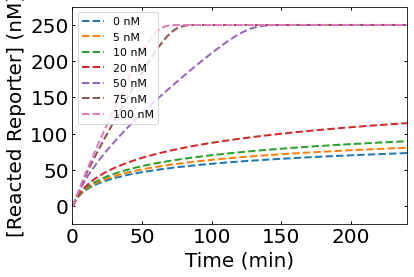

In [14]:
# Import packages
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# Function for the comparator based on Eqns S6, S7, S8
def Comparator(y, t, k_txn, k_th, k_sd, Ref_dART, IFN_dART, Reporter0):
    Ref_RNA, IFN_RNA, Reporter_reacted = y
    dRef_RNAdt = k_txn*Ref_dART - k_th*Ref_RNA*IFN_RNA - k_sd*Ref_RNA*Reporter0 + k_sd*Ref_RNA*Reporter_reacted
    dIFN_RNAdt = k_txn*IFN_dART - k_th*Ref_RNA*IFN_RNA
    dReporter_reacteddt = k_sd*Ref_RNA*Reporter0 - k_sd*Ref_RNA*Reporter_reacted
    return [dRef_RNAdt, dIFN_RNAdt, dReporter_reacteddt]


# Initial conditions
Ref_RNA0 = 0 # Initial Ref-O1-RNA concentration
IFN_RNA0 = 0 # Initial IFN-O1'-RNA concentration
Reporter_reacted0 = 0.0 # Initial Reacted reporter concentration
y0 = [Ref_RNA0, IFN_RNA0, Reporter_reacted0]
k_txn = 0.004 * 60 # Fitted transcription rate constant
k_th = 1e6/1e9 * 60 # RNA:RNA hybridization rate constant
k_sd = 1e5/1e9 * 60 # Strand displacement rate constant based on 6 bp toehold
Reporter0 = 250 # Initial Reporter concentration
Ref_dART = 25 # Initial Ref-O1-dART concentration
IFN_dART_0 = 50 # Initial IFN-O1'-dART concentration

IFN_list = [0, 5, 10, 20, 50, 75, 100] # List of varying IFN-γ concentration

# Define a function to calculate unbound IFN-O1'-dART concentration based on Kd,apparent and a list of IFN-γ concentrations
# Based on Eqn S5
def calculate_IFN_dART_unbound(L_0, K_D):
    m = (IFN_dART_0+K_D+L_0) 
    IFN_dART_bound = ((m)-(math.sqrt((m**2)-4*(IFN_dART_0*L_0))))/2
    IFN_dART_unbound = IFN_dART_0 - IFN_dART_bound
    return IFN_dART_unbound

sim_IFN_dART_unbound_list = []

for IFN in IFN_list:
    # Calculate unbound_dART concentrations based on a Kd value and list of ligand concentrations
    sim_IFN_dART_unbound_list.append(calculate_IFN_dART_unbound(IFN, 8)) # Estimated Kd (dashed line)

# Time interval of the reaction between 0 and 240 minutes.
t = np.linspace(0, 240, 1000)
# Calculate reacted reporter kinetics based on each concentration of unbound IFN-O1'-dART
for IFN_dART in sim_IFN_dART_unbound_list:
    React_rep = odeint(Comparator, y0, t, args=(k_txn, k_th, k_sd, Ref_dART, IFN_dART, Reporter0))
    # extract Reporter_reacted concentration for each concentration of unbound IFN-O1'-dART
    Reporter_reacted = React_rep[:, 2]
    # plot the reacted reporter kinetics
    lw = 2
    plt.plot(t, Reporter_reacted, linestyle = '--',  label = '0 nM', linewidth=lw)

fs = 20
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(-25,275)
plt.xlim(0,240)
ax1 = plt.gca()
ax1.xaxis.set_tick_params(which='both',size=3,width=1,direction='in',top='on')
ax1.yaxis.set_tick_params(which='both',size=3,width=1,direction='in',right='on')
plt.xlabel('Time (min)',fontsize=fs)
plt.ylabel('[Reacted Reporter] (nM)',fontsize=fs)
plt.legend(["0 nM", "5 nM", "10 nM", "20 nM", "50 nM", "75 nM", "100 nM"], loc='upper left', fontsize=11)
# plt.title("IFN-γ", fontsize=fs-1, weight='bold', loc = 'right')

# plt.savefig('Figure 5c.svg')





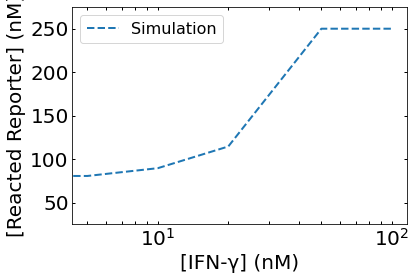

In [18]:
'''Plotting dose-response curve of the comparator with varying IFN-γ concentrations'''

# create an empty list to store the simulated Reporter_reacted values for each unbound_dART concentration
sim_Reporter_reacted_list = []

# Simulation for the Comparator for varying unbound IFN-O1'-dART concentrations
for IFN_dART in sim_IFN_dART_unbound_list:
    # Calculate reacted reporter kinetics based on each concentration of unbound IFN-O1'-dART
    React_rep = odeint(Comparator, y0, t, args=(k_txn, k_th, k_sd, Ref_dART, IFN_dART, Reporter0))
    # extract the Reporter_reacted concentration
    Reporter_reacted = React_rep[:, 2]
    # Endpoint measurement
    sim_Reporter_reacted_list.append(Reporter_reacted[-1])
    
# plot the dose-response curve    
plt.plot(IFN_list, sim_Reporter_reacted_list, linestyle = '--',  label = 'Simulation', linewidth=lw)


plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(25,275)
ax1 = plt.gca()
ax1.set_xscale('log')
ax1.xaxis.set_tick_params(which='both',size=3,width=1,direction='in',top='on')
ax1.yaxis.set_tick_params(which='both',size=3,width=1,direction='in',right='on')
plt.xlabel('[IFN-γ] (nM)',fontsize=fs)
plt.ylabel('[Reacted Reporter] (nM)',fontsize=fs)
plt.legend(fontsize=fs-4)
# plt.title("IFN-γ", fontsize=fs-1, weight='bold', loc = 'right')

# plt.savefig('Figure 5e.svg')


